# CS445: Computational Photography
## Final Project: Name


## Recovering HDR Radiance Maps 

Load libraries and data

In [4]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# modify to where you store your project data including utils
datadir = "/Users/patrick/CS445/Project_Final/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
imagesfn = datadir + "images"
!cp -r "$imagesfn" .


cp: ./utils.py and /Users/patrick/CS445/Project_Final/utils.py are identical (not copied).
cp: /Users/patrick/CS445/Project_Final/images: No such file or directory


In [6]:
#!pip uninstall opencv-python -y
# downgrade OpenCV a bit to use SIFT
#!pip install opencv-contrib-python==3.4.2.17 --force-reinstall
#!pip install opencv-contrib-python --user
#!pip install ffmpeg-python # for converting to video

import ffmpeg
import cv2
import numpy as np
import os
import dlib
from numpy.linalg import svd, inv
import utils
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
# Split input video into frames for blending
utils.video2imageFolder('/Users/patrick/CS445/Project_Final/samples/snapchat.mp4', 
                        "/Users/patrick/CS445/Project_Final/frames")

Frame count: 166.0


NameError: name 'frameId' is not defined

In [9]:
# Function for loading frames
def load_frames(filepath):
    frames = []
    for filename in os.listdir(filepath):
        img = cv2.imread(os.path.join(filepath,filename))
        if img is not None:
            frames.append(img)
    return frames

In [10]:
# Load Frames
frames = load_frames("/Users/patrick/CS445/Project_Final/frames")

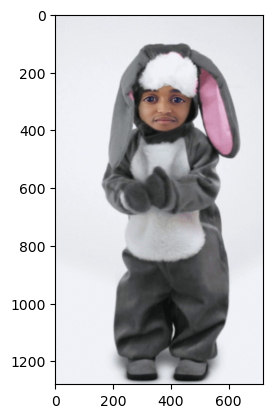

In [12]:
# Testing for one image
test = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.figure()
plt.imshow(test)
plt.show()

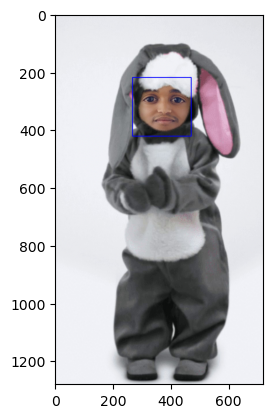

In [13]:
# Testing face detection

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Create copy of frame
curr_frame = frames[0].copy()

# Convert into grayscale
gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(curr_frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
# Display the output
curr_face_detection = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.figure()
plt.imshow(curr_face_detection)
plt.show()